## Random Forest Classifier

Given that we have a large dataset and a mix of categorical and numerical data, we can start with Random Forest due to its ability to handle complex relationships and mixed data types without extensive preprocessing.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    log_loss
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('matches_between_2010_2018.csv')

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X = df.drop('player_victory', axis=1)
y = df['player_victory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Log Loss: {logloss:.2f}')

Accuracy: 0.9971
Precision: 0.9976
Recall: 0.9965
F1 Score: 0.9971
ROC-AUC Score: 0.9998
Confusion Matrix:
[[21015    51]
 [   73 21049]]
Log Loss: 0.02


To evaluate our classification model comprehensively, we can use a variety of metrics. Each metric provides different insights into the performance of the model. Here are some common metrics used for binary classification tasks which we have printed out for this model:

Accuracy: The proportion of true results (both true positives and true negatives) among the total number of cases examined.

Precision: The ratio of true positives to all positive predictions. Precision is a measure of the accuracy of the positive predictions.

Recall (Sensitivity): The ratio of true positives to all actual positives. Recall measures the ability of the classifier to find all the positive samples.

F1 Score: The harmonic mean of precision and recall. An F1 score balances the trade-off between precision and recall.

ROC-AUC Score: The area under the receiver operating characteristic (ROC) curve. It is a plot of the true positive rate against the false positive rate for the different possible cut points of a diagnostic test.

Confusion Matrix: A table used to describe the performance of a classification model on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

Log Loss (Cross-Entropy Loss): Measures the performance of a classification model where the prediction is a probability between 0 and 1. The loss increases as the predicted probability diverges from the actual label.

## Results Visualizations

### Confusion Matrix

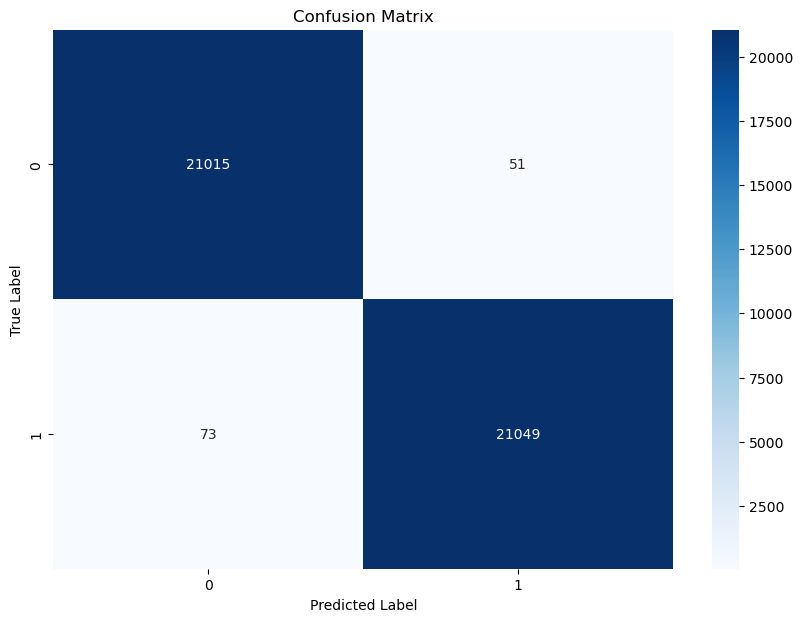

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined as they are the true labels and model predictions respectively

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

This is a table that is used to describe the performance of a classification model.

True Positives (TP): The cases in which the model correctly predicted the positive class.

True Negatives (TN): The cases in which the model correctly predicted the negative class.

False Positives (FP): The cases in which the model incorrectly predicted the positive class (also known as a "Type I error").

False Negatives (FN): The cases in which the model incorrectly predicted the negative class (also known as a "Type II error").

The heatmap visualization of the confusion matrix uses color to emphasize the different values, with darker colors  representing higher numbers. This visualization makes it easy to see the proportion of correct and incorrect predictions.

### ROC Curve

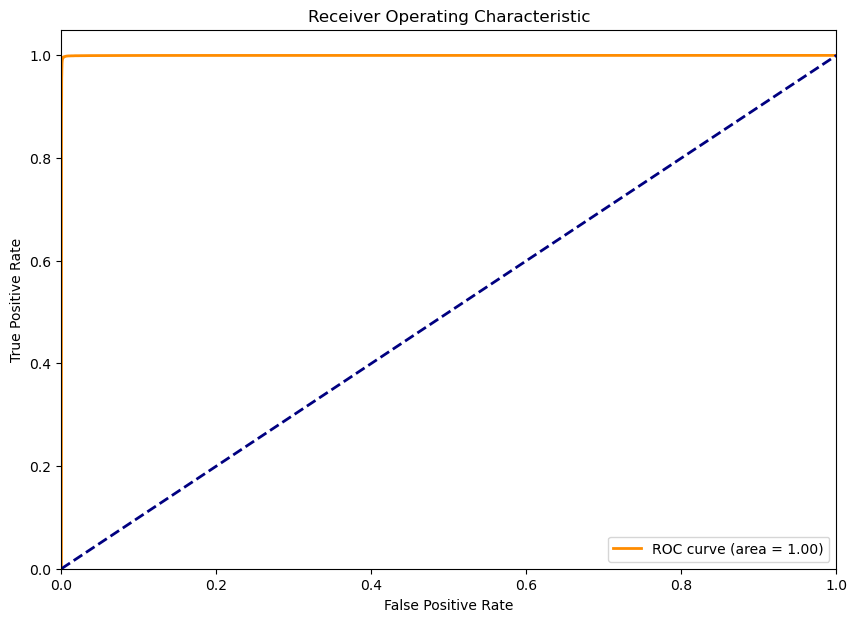

In [4]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

True Positive Rate (TPR): Also known as recall, it is the ratio of TP to the sum of TP and FN.

False Positive Rate (FPR): It is the ratio of FP to the sum of FP and TN.

The area under the ROC curve (AUC) is a measure of the model's ability to distinguish between the classes. An AUC of 0.5 suggests no discrimination (i.e., random chance), while an AUC of 1.0 indicates perfect discrimination.

In this case, we have an AUC of 1.0 which means our model is perfect; it accurately disriminates if a certain player wins a match or not almost every time.

### Precision-Recall Curve

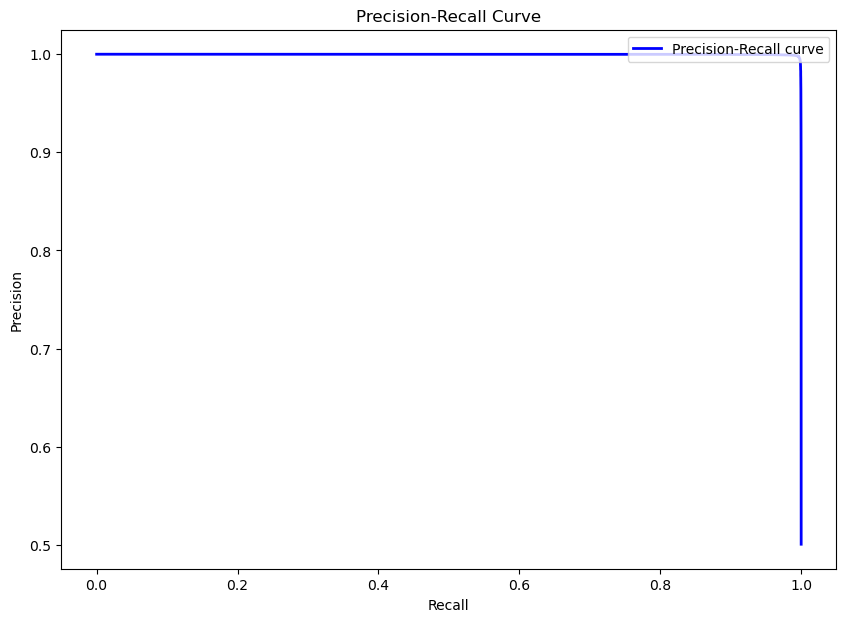

In [5]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

The Precision-Recall curve shows the trade-off between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

Precision: The ratio of TP to the sum of TP and FP.
Recall: The ratio of TP to the sum of TP and FN.
This curve is particularly useful when the classes are very imbalanced. Unlike the ROC curve, the Precision-Recall curve focuses on the performance of the positive class.

### Feature Importance

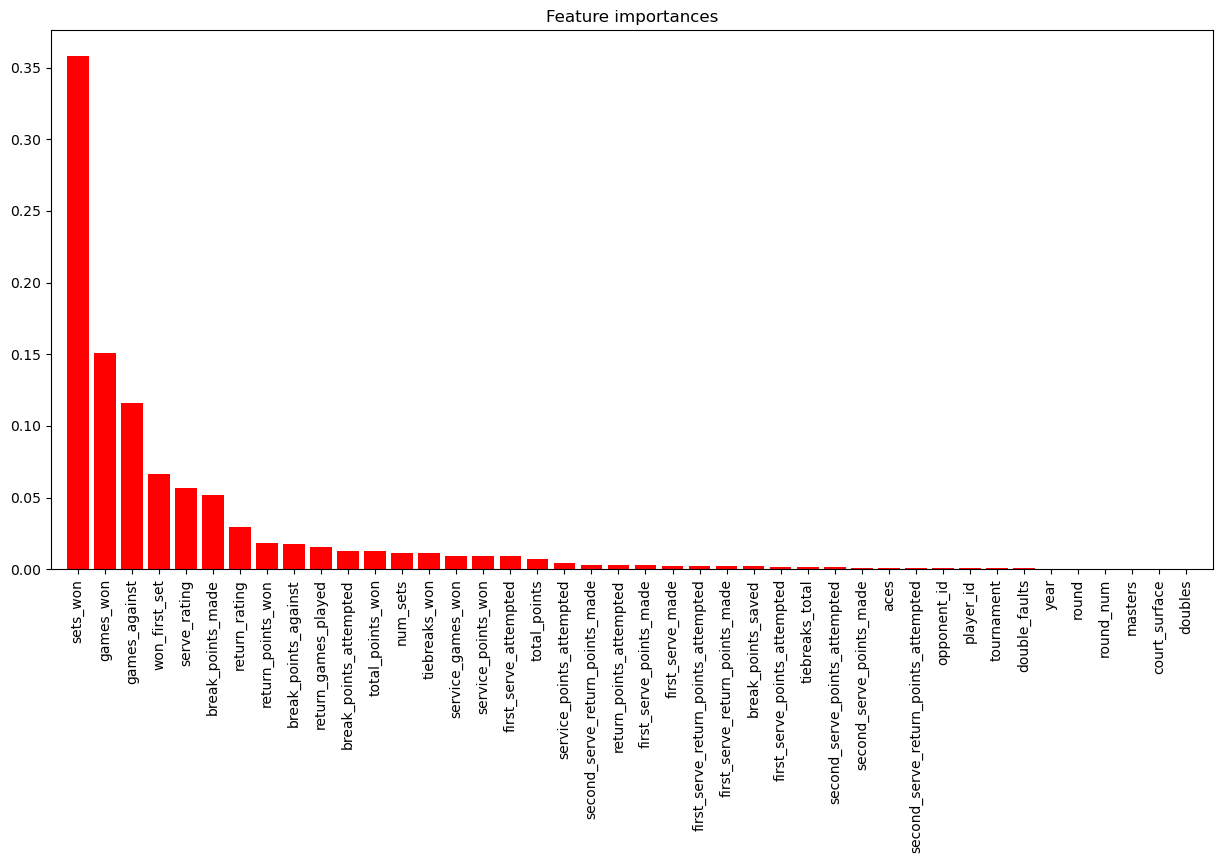

In [7]:
import numpy as np

importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable. Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Random Forest Classifier for extracting the top features for our dataset.

Higher Bar: Indicates that the feature is more important for the model when making predictions.

Lower Bar: Indicates that the feature is less important.

In the bar chart, each bar represents a feature in the dataset, and the length of the bar corresponds to the importance score. This helps in understanding which features have the most impact on the predictions made by the model.

In this case, we see that a lot of the features that we left in aren't really useful in our classification task. Instead, a small number of features are being used the most in our model. For instance, sets_won and games_won are the two most important predictors for this problem. This makes sense because if a player wins a lost of sets/games, that typically means they will win the next one.

This also suggests that we should perform feature reduction on this dataset to get a simpler model which reduces the features that are used in the predictions.

## PCA

In [2]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# to keep 95% of variance, set n_components to 0.95
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_pca, y_train)

y_pred = rf_classifier.predict(X_test_pca)
y_pred_proba = rf_classifier.predict_proba(X_test_pca)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Log Loss: {logloss:.4f}')

Accuracy: 0.9714
Precision: 0.9707
Recall: 0.9722
F1 Score: 0.9715
ROC-AUC Score: 0.9963
Confusion Matrix:
[[20446   620]
 [  587 20535]]
Log Loss: 0.0939


### Variance Visualization

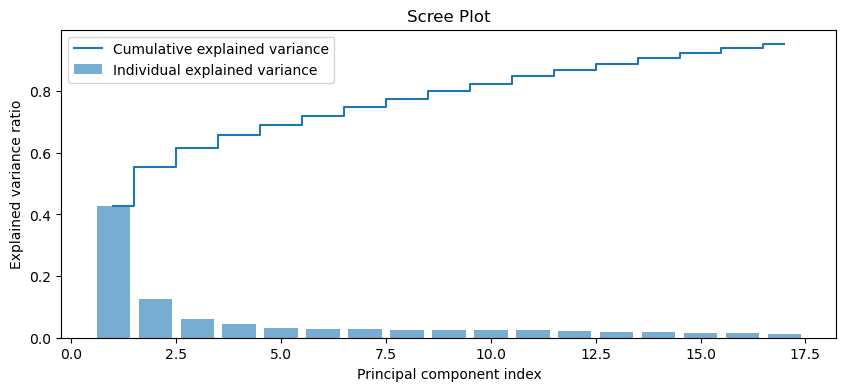

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Scree Plot')
plt.show()

## XGB Boost

In [4]:
# Import necessary libraries
import xgboost as xgb

# Create the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Fit the model on the PCA-transformed training data
xgb_classifier.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test data
y_pred_xgb = xgb_classifier.predict(X_test_pca)
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_pca)[:, 1]

# Calculate the performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
logloss_xgb = log_loss(y_test, y_pred_proba_xgb)

# Print the metrics
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print(f'XGBoost Precision: {precision_xgb:.4f}')
print(f'XGBoost Recall: {recall_xgb:.4f}')
print(f'XGBoost F1 Score: {f1_xgb:.4f}')
print(f'XGBoost ROC-AUC Score: {roc_auc_xgb:.4f}')
print(f'XGBoost Confusion Matrix:\n{conf_matrix_xgb}')
print(f'XGBoost Log Loss: {logloss_xgb:.4f}')

XGBoost Accuracy: 0.9760
XGBoost Precision: 0.9746
XGBoost Recall: 0.9775
XGBoost F1 Score: 0.9761
XGBoost ROC-AUC Score: 0.9974
XGBoost Confusion Matrix:
[[20529   537]
 [  476 20646]]
XGBoost Log Loss: 0.0631


# Unsupervised Learning

/Users/pujithvi/miniconda3/envs/mlhw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pujithvi/miniconda3/envs/mlhw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pujithvi/miniconda3/envs/mlhw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pujithvi/miniconda3/envs/mlhw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

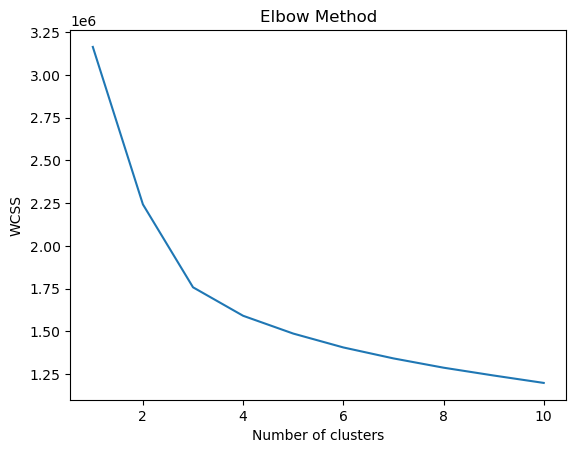

/Users/pujithvi/miniconda3/envs/mlhw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Stats for Cluster 0:
serve_rating                       259.674347
aces                                 5.197283
double_faults                        3.034060
first_serve_made                    45.407087
first_serve_points_made             31.702354
second_serve_points_made            14.402684
break_points_saved                   4.109128
return_rating                      120.719572
first_serve_return_points_made      11.263962
second_serve_return_points_made     12.635195
break_points_made                    1.601761
games_won                           10.481843
games_against                       12.678500
service_games_won                   11.283413
total_points_won                    70.004195
dtype: float64
----
Stats for Cluster 1:
serve_rating                       194.927358
aces                                 1.899690
double_faults                        2.975879
first_serve_made                    29.708322
first_serve_points_made             17.288324
second_serve_point

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data (assuming the data is in a CSV file named "tennis_data.csv")
data = pd.read_csv('matches_between_2010_2018.csv')

# Select relevant features
features = ['serve_rating', 'aces', 'double_faults', 'first_serve_made', 
            'first_serve_points_made', 'second_serve_points_made', 'break_points_saved', 
            'return_rating', 'first_serve_return_points_made', 'second_serve_return_points_made', 
            'break_points_made', 'games_won', 'games_against', 'service_games_won', 
            'total_points_won']

# Extract the features
X = data[features]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method result
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Assuming optimal number of clusters from the plot is 'k'
k = 5  # Replace with the number you determine
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster information to the original data
data['Cluster'] = clusters

# Analyze the clusters
for i in range(k):
    cluster_data = data[data['Cluster'] == i]
    print(f"Stats for Cluster {i}:")
    print(cluster_data[features].mean())
    print("----")
